# 1. Install packages

In [1]:
# pip install yfinance transformers torch
# pip install newsapi-python

# 2. Import Libraries

In [2]:
# import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 3. Read Data

In [3]:
df_cleaned = pd.read_csv('stock_prices_cleaned.csv')
# Convert 'Date' to datetime format 
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
print(f"shape: {df_cleaned.shape}")

shape: (23990, 8)


In [4]:
df_cleaned['Ticker'].value_counts()

Ticker
AAPL    6288
AMZN    6288
MSFT    6288
GOOG    5126
Name: count, dtype: int64

# EDA

In [5]:
# Display basic information
print(df_cleaned.info())
print(df_cleaned.head())  # Show the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23990 entries, 0 to 23989
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               23990 non-null  datetime64[ns]
 1   Ticker             23990 non-null  object        
 2   Volume             23990 non-null  float64       
 3   High               23990 non-null  float64       
 4   Low                23990 non-null  float64       
 5   Open               23990 non-null  float64       
 6   Close              23990 non-null  float64       
 7   target_next_close  23990 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.5+ MB
None
        Date Ticker       Volume       High        Low       Open      Close  \
0 2000-01-03   AAPL  535796800.0   0.846382   0.765036   0.789017   0.842151   
1 2000-01-03   AMZN  322352000.0   4.478125   3.952344   4.075000   4.468750   
2 2000-01-03   MSFT   5322

In [6]:
print(df_cleaned.isnull().sum())  # Count missing values in each column

Date                 0
Ticker               0
Volume               0
High                 0
Low                  0
Open                 0
Close                0
target_next_close    0
dtype: int64


In [7]:
print(df_cleaned.describe())  # Get summary statistics of numerical columns

                                Date        Volume          High  \
count                          23990  2.399000e+04  23990.000000   
mean   2012-12-29 12:08:20.608587008  1.696413e+08     55.343958   
min              2000-01-03 00:00:00  1.584340e+05      0.198467   
25%              2007-02-15 06:00:00  4.356610e+07      9.214989   
50%              2013-01-31 00:00:00  8.173145e+07     21.141446   
75%              2019-01-15 00:00:00  1.758500e+08     69.364078   
max              2024-12-30 00:00:00  7.421641e+09    465.639777   
std                              NaN  2.518873e+08     77.225768   

                Low          Open         Close  target_next_close  
count  23990.000000  23990.000000  23990.000000       23990.000000  
mean      54.189672     54.770087     54.786319          54.813822  
min        0.191395      0.195458      0.197414           0.195458  
25%        8.950625      9.095250      9.086372           9.097537  
50%       20.671945     20.880448     20.8

# Data Visualization

Data viz is done only for AAPL and MSFT and after 2015

In [8]:
selected_tickers = ['AAPL', 'MSFT'] # 
# Filter data by tickers and date range
df_visualization = df_cleaned[
    (df_cleaned['Ticker'].isin(selected_tickers)) &
    (df_cleaned['Date'] >= '2015-01-01') 
].copy()
df_visualization.head()

,Date,Ticker,Volume,High,Low,Open,Close,target_next_close
13930,2015-01-02,AAPL,212818400.0,24.789796,23.879976,24.778673,24.320427,24.089082
13933,2015-01-02,MSFT,27913900.0,40.637735,39.883600,39.986436,40.072132,39.737905
13934,2015-01-05,AAPL,257142000.0,24.169164,23.448427,24.089082,23.635284,23.699802
13937,2015-01-05,MSFT,39673900.0,40.046416,39.635069,39.737905,39.703629,39.746479
13938,2015-01-06,AAPL,263188400.0,23.897782,23.274922,23.699802,23.637516,23.846617


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price ($)')

Text(0.5, 1.0, 'AAPL vs MSFT Closing Prices Over Time')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

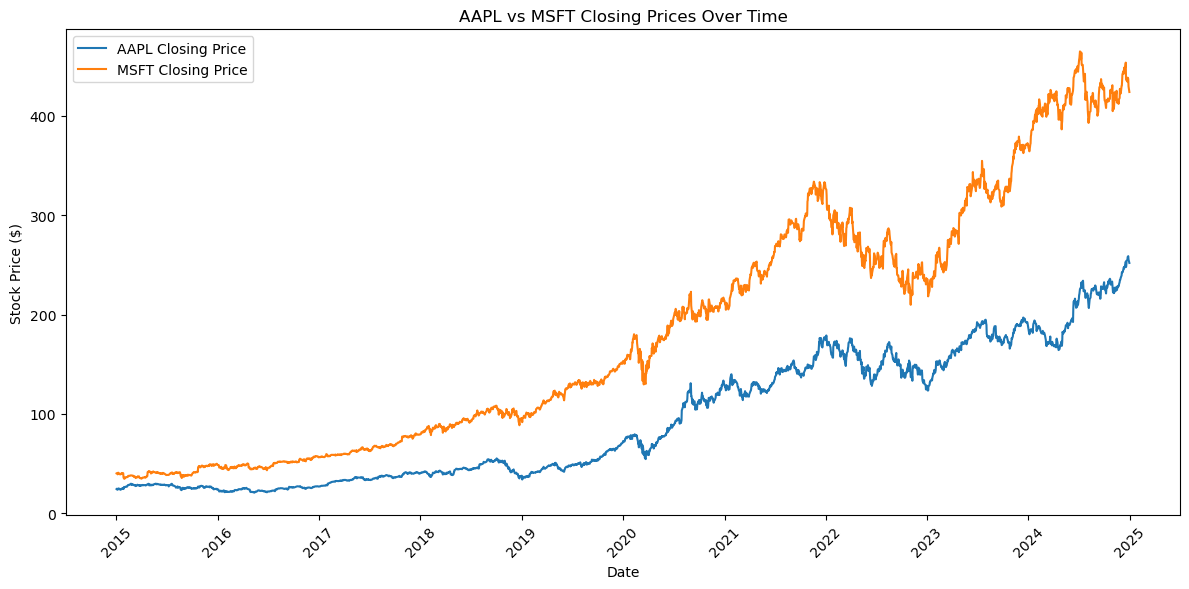

In [9]:
# Plot the Closing Price over time
# Set up the plot
plt.figure(figsize=(12,6))

# Loop through each ticker and plot
tickers = ['AAPL', 'MSFT']
for ticker in tickers:
    stock_data = df_visualization[df_visualization['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{ticker} Closing Price")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("AAPL vs MSFT Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price ($)')

Text(0.5, 1.0, 'AAPL Stock Price with 50 & 200-Day Moving Averages')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

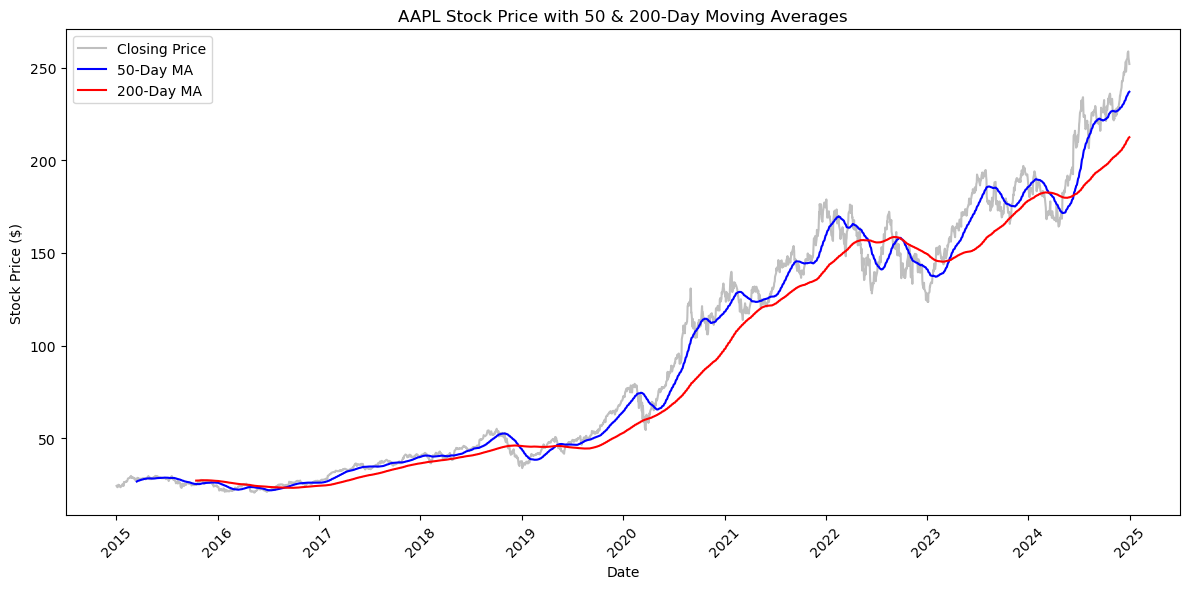

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price ($)')

Text(0.5, 1.0, 'MSFT Stock Price with 50 & 200-Day Moving Averages')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

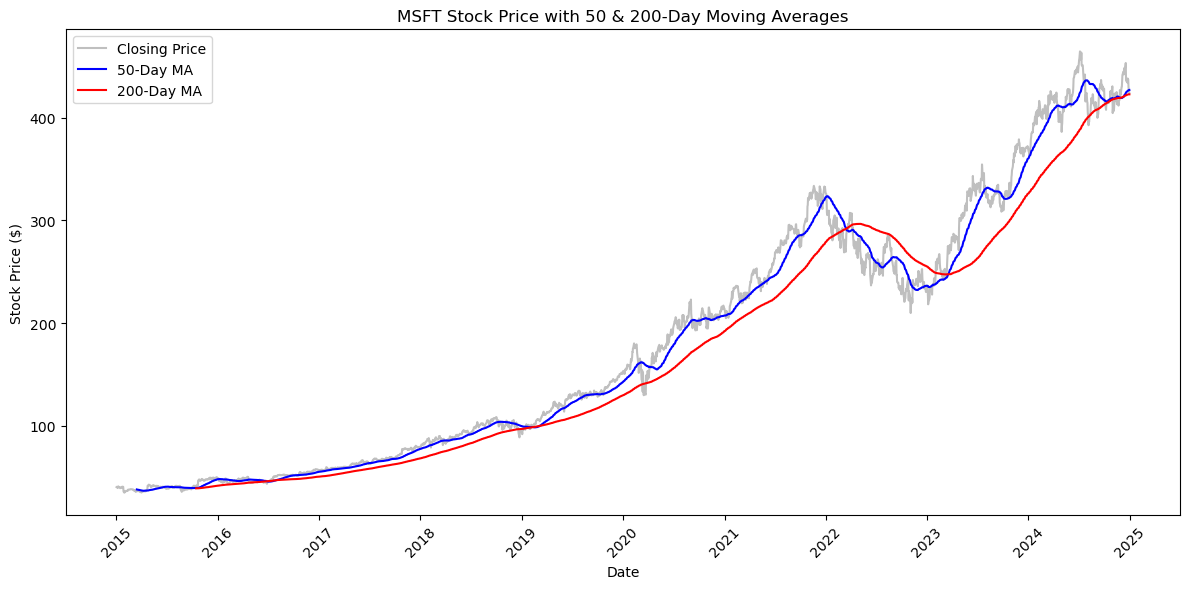

In [10]:
# Loop through each ticker and create moving average plot
for ticker in tickers:
    stock_data = df_visualization[df_visualization['Ticker'] == ticker].copy()

    # Calculate moving averages
    stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color='gray', alpha=0.5)
    plt.plot(stock_data['Date'], stock_data['MA50'], label="50-Day MA", color='blue')
    plt.plot(stock_data['Date'], stock_data['MA200'], label="200-Day MA", color='red')
    plt.xlabel("Date")
    plt.ylabel("Stock Price ($)")
    plt.title(f"{ticker} Stock Price with 50 & 200-Day Moving Averages")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Daily Change', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Daily Price Changes: AAPL')

Text(0.5, 0, 'Price Change ($)')

Text(0, 0.5, 'Frequency')

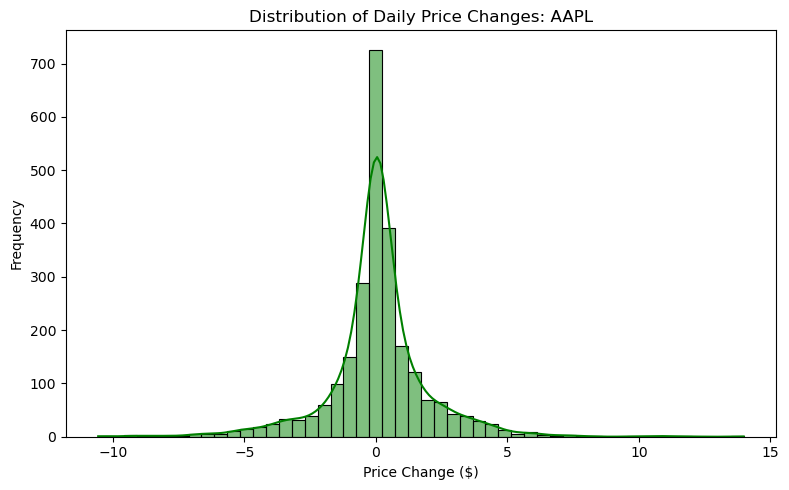

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Daily Change', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Daily Price Changes: MSFT')

Text(0.5, 0, 'Price Change ($)')

Text(0, 0.5, 'Frequency')

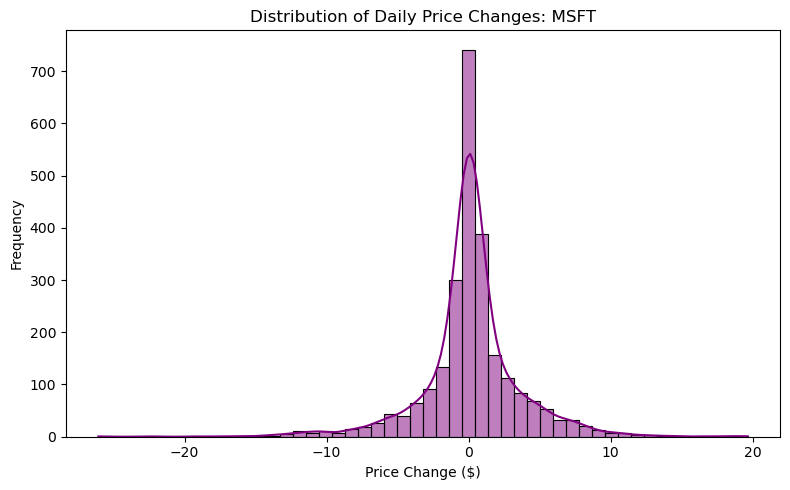

In [11]:
ticker_colors = {
    'AAPL': 'green',   # Apple → green
    'MSFT': 'purple'   # Microsoft → purple
}
# Loop through each ticker
for ticker in ticker_colors:
    stock_data = df_visualization[df_visualization['Ticker'] == ticker].copy()
    
    # Calculate daily price change
    stock_data['Daily Change'] = stock_data['Close'].diff()
    
    # Plot histogram
    plt.figure(figsize=(8,5))
    sns.histplot(stock_data['Daily Change'].dropna(), bins=50, kde=True, color=ticker_colors[ticker])
    plt.title(f"Distribution of Daily Price Changes: {ticker}")
    plt.xlabel("Price Change ($)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

<Axes: >

Text(0.5, 1.0, 'AAPL Feature Correlation Heatmap')

<Axes: >

Text(0.5, 1.0, 'MSFT Feature Correlation Heatmap')

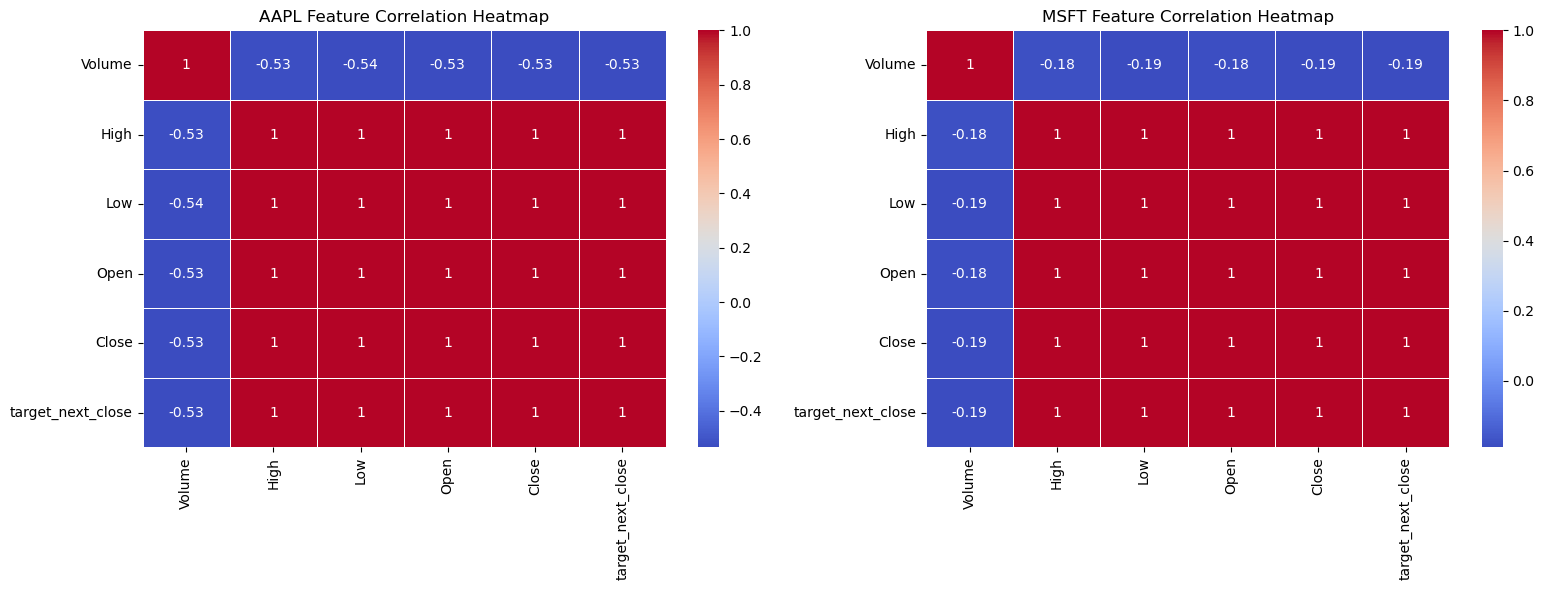

In [12]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loop over tickers and axes
for ax, ticker in zip(axes, tickers):
    stock_data = df_visualization[df_visualization['Ticker'] == ticker].copy()
    
    # Select only numeric columns
    numeric_cols = stock_data.select_dtypes(include='number')
    
    # Compute and plot heatmap
    corr_matrix = numeric_cols.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(f"{ticker} Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'MSFT Closing Prices')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

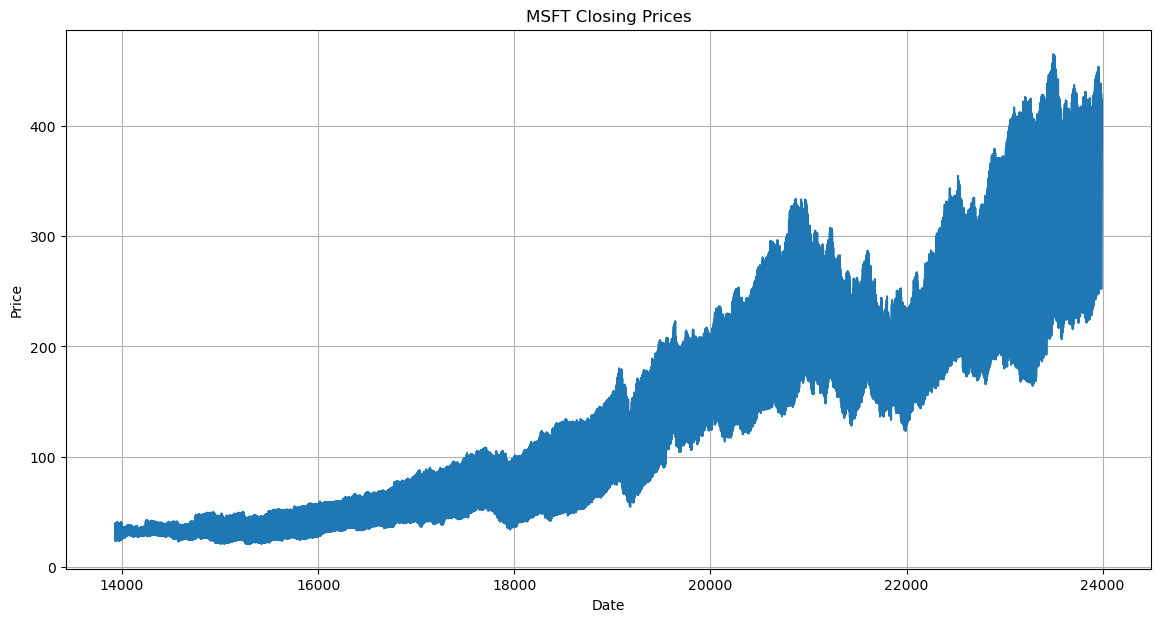

In [13]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df_visualization['Close'])
plt.title(f'{ticker} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'MSFT Stock Prices (OHLC)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

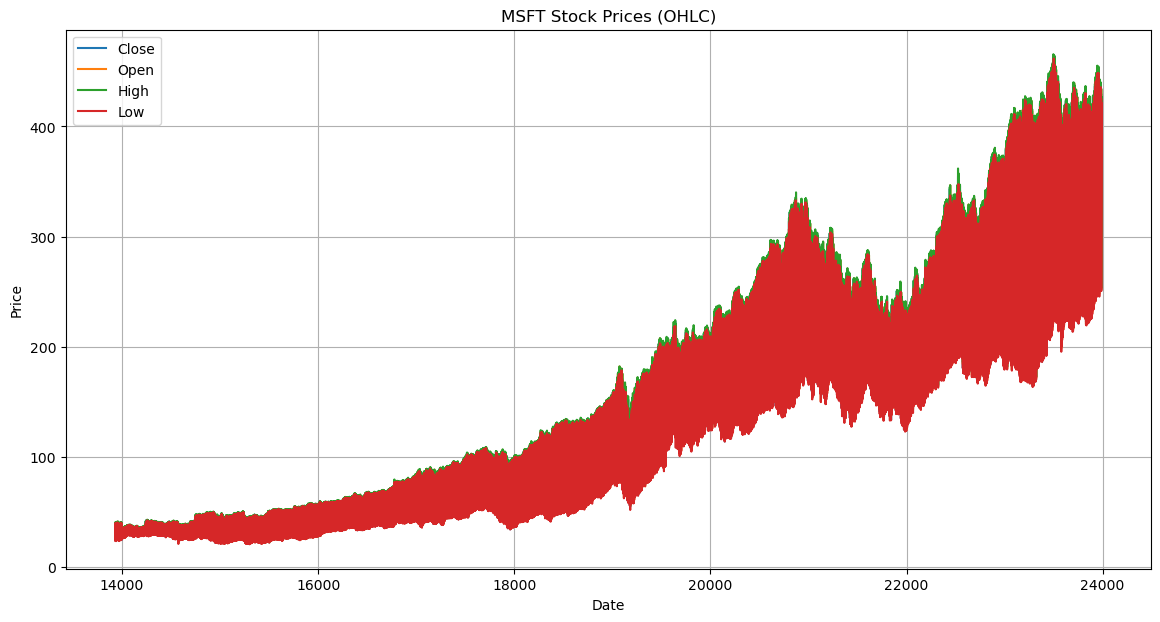

In [14]:
# Plot multiple features (e.g., Close, Open, High, Low)
plt.figure(figsize=(14,7))
plt.plot(df_visualization['Close'], label='Close')
plt.plot(df_visualization['Open'], label='Open')
plt.plot(df_visualization['High'], label='High')
plt.plot(df_visualization['Low'], label='Low')
plt.title(f'{ticker} Stock Prices (OHLC)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Data Visualization For all five ticker 

In [15]:
df_visualization1 = df_cleaned[
    (df_cleaned['Date'] >= '2015-01-01') 
].copy()
df_visualization1.head()

,Date,Ticker,Volume,High,Low,Open,Close,target_next_close
13930,2015-01-02,AAPL,212818400.0,24.789796,23.879976,24.778673,24.320427,24.089082
13931,2015-01-02,AMZN,55664000.0,15.737500,15.348000,15.629000,15.426000,15.350500
13932,2015-01-02,GOOG,28951268.0,26.365890,26.010056,26.253730,26.045292,25.968368
13933,2015-01-02,MSFT,27913900.0,40.637735,39.883600,39.986436,40.072132,39.737905
13934,2015-01-05,AAPL,257142000.0,24.169164,23.448427,24.089082,23.635284,23.699802


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Stock Price Trends (Close) Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

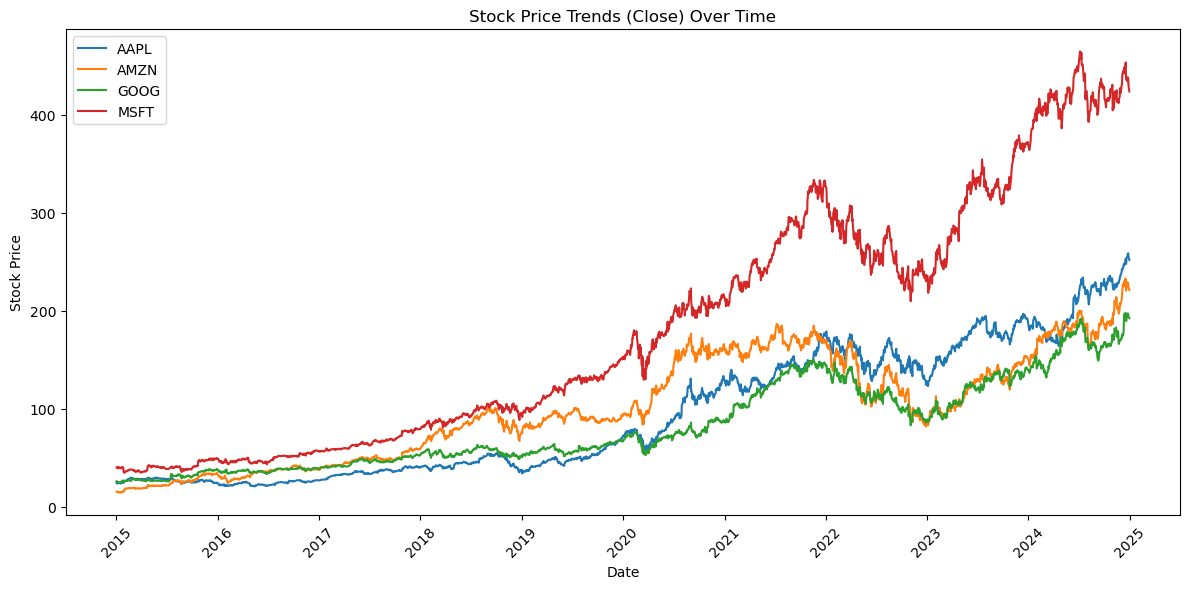

In [16]:
# Pivot data to structure it for plotting
pivot_df = df_visualization1.pivot(index='Date', columns='Ticker', values='Close')

# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[ticker], label=ticker)

plt.title('Stock Price Trends (Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Stock Volatility (Daily Returns) Since 2015'}, xlabel='Date'>

Text(0, 0.5, 'Daily Return')

Text(0.5, 0, 'Date')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

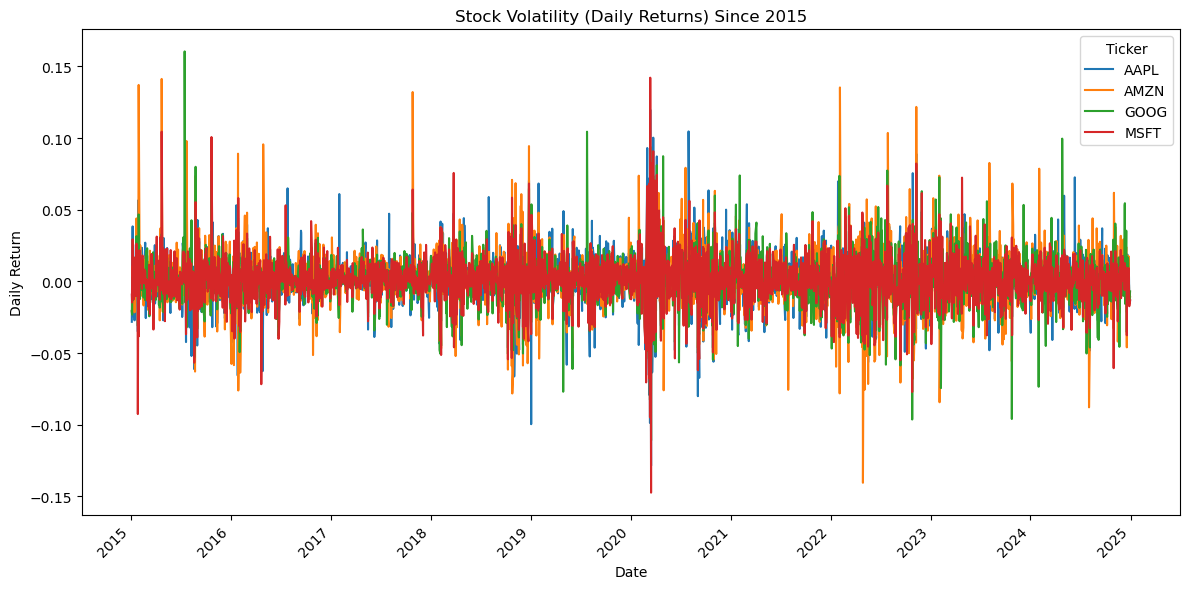

In [18]:
# Pivot to get Close prices per Ticker
close_prices = df_visualization1.pivot(index='Date', columns='Ticker', values='Close')

# Calculate daily returns (volatility)
daily_returns = close_prices.pct_change()

# Plotting volatility
daily_returns.plot(figsize=(12, 6), title="Stock Volatility (Daily Returns) Since 2015")
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Ticker', ylabel='Ticker'>

Text(0.5, 1.0, 'Stock Price Correlation')

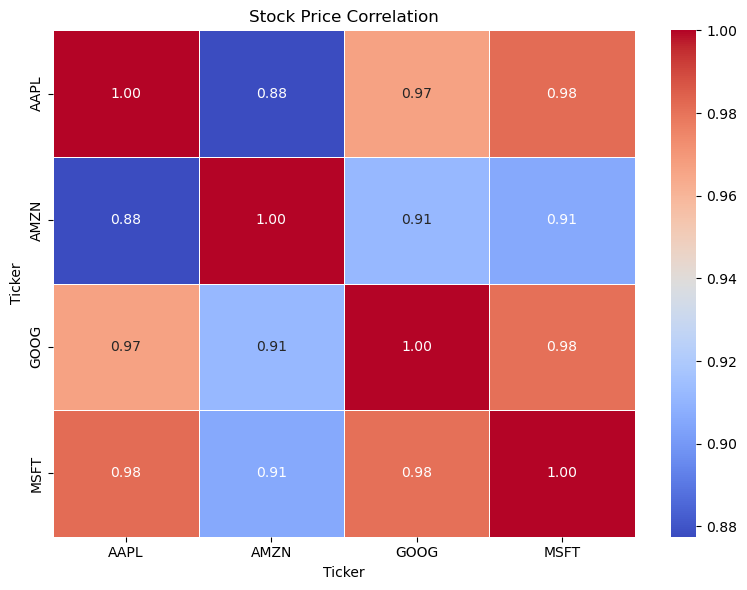

In [19]:

# Pivot to get Close prices per Ticker
close_prices = df_visualization1.pivot(index='Date', columns='Ticker', values='Close')

# Compute correlation matrix
correlation = close_prices.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Stock Price Correlation")
plt.tight_layout()
plt.show()
